In [1]:
options(repr.plot.width=8, repr.plot.height=5) #set a common width/height for plots

# Exercise 1
A set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values ($x$), with the corresponding probabilities given by the two methods ($p_1$ and $p_2$).

In [2]:
x  <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

Evaluate the expected values $\mathbb{E}[X]$, and the variance $\rm{Var}(X)$ for both methods.

In [3]:
expected_value <- function(x, p) {
    return (sum(x * p))
}

variance <- function(x, p) {
    mean <- expected_value(x, p)
    return (sum(x * x * p) - mean * mean)
}

sprintf("---Method 1---")
sprintf("Expected value: %.3f", expected_value(x, p1))
sprintf("Variance: %.3f", variance(x, p1))

sprintf("---Method 2---")
sprintf("Expected value: %.3f", expected_value(x, p2))
sprintf("Variance: %.3f", variance(x, p2))

[1] "---Method 1---"

[1] "Expected value: 15.959"

[1] "Variance: 0.034"

[1] "---Method 2---"

[1] "Expected value: 15.962"

[1] "Variance: 0.028"

# Exercise 2
The waiting time, in minutes, at the doctor's is about $30$ minutes, and the distribution follows an exponential pdf with rate $1/30$.

a. Simulate the waiting time for $50$ people at the doctor's office and plot the relative histogram

[1]  38.4872130   0.4229531  49.6816322  53.9544536  43.8701027  20.1853622
 [7]  43.3490471  31.9404299  17.0685844   9.7386745  54.8274955   7.8311716
[13]   1.2556224  80.5247777   1.0473973   3.8614629 121.2023205  17.9386396
[19]  46.6145794  17.0966648  58.1362416   9.6996080 143.1319138  13.6167718
[25]   0.7009824  25.8781671   2.3048901  24.1635533  24.4669687   2.8976165
[31]  30.9173996  20.4686892  14.3948508  19.2542583  11.9660970   9.0521551
[37]  22.2654832  19.4299764  35.7012143  43.1029121  25.7273270  14.4811830
[43]   0.1085897  56.3792142  19.7243898  44.6988030   9.5973609  20.0045897
[49]   3.6056039  63.2863283

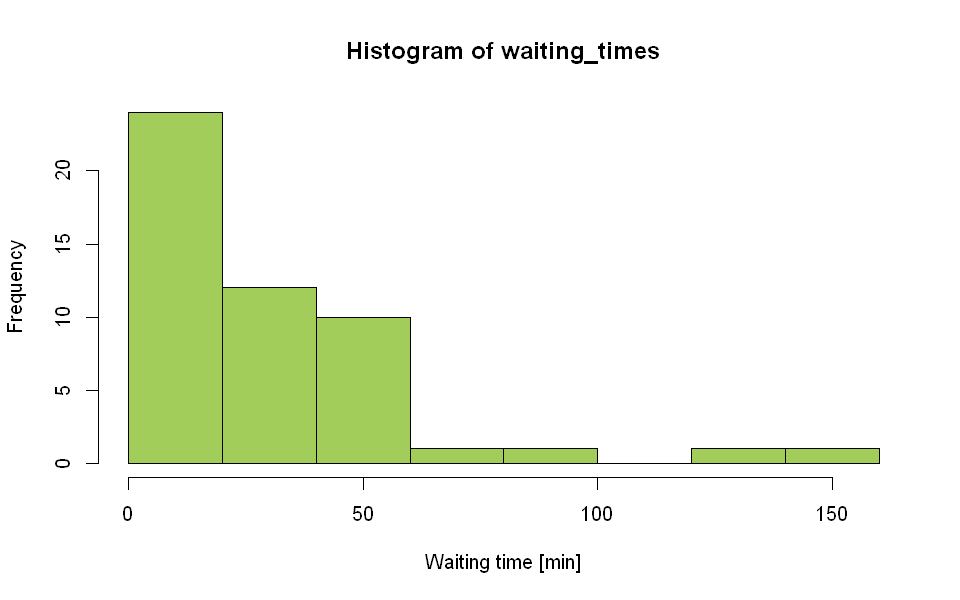

In [4]:
(waiting_times <- rexp(50, 1/30))

hist(waiting_times, col="darkolivegreen3", xlab="Waiting time [min]", ylab="Frequency")

b. What is the probability that a person will wait for less than $10$ minutes?

In [5]:
#It is equal to CDF(10) = P(X <= 10):
(p_less_10_min = pexp(10, rate=1/30))

[1] 0.2834687

c. Evaluate the average waiting time from simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [6]:
average_from_data <- mean(waiting_times)
average_from_theory <- 30

In [7]:
num <- 10000
average_from_pdf <- sum(seq(0:num) * dexp(seq(0:num), rate = 1/30))

sprintf("Average from data: %.2f", average_from_data)
sprintf("Average from theory: %.2f", average_from_theory)
sprintf("Average from pdf: %.2f", average_from_pdf)

[1] "Average from data: 29.00"

[1] "Average from theory: 30.00"

[1] "Average from pdf: 30.00"

The expected value for a non-negative discrete random variable $X$ is:
$$\mathbb{E}[X] = \sum_{j=0}^{+\infty} j\,\mathbb{P}[X=j]$$
As $\mathbb{P}[X=j] \to 0$ for $j \to \infty$, we can truncate the sum to a large (but finite) number of terms $N$ to get an approximation for $\mathbb{E}[X]$.

d. What is the probability for waiting more than one houre before being received?

In [8]:
#P(X > 1h) = 1 - P(X <= 1h) = 1 - CDF(1h)
(p_more_1_hour = 1 - pexp(60, rate=1/30))

[1] 0.1353353

# Exercise 3
Let's suppose that on a book, on average, there is one typo error every $3$ pages. If the number of errors follows a Poisson distribution, plot the pdf and the cdf, and calculate the probability that there is at least one error on a specific page of the book.

**Solution** If there is one typo error every $3$ pages, then the average number of errors per page is $1/3$, which is then the $\lambda$ parameter for the Poisson distribution describing the errors.

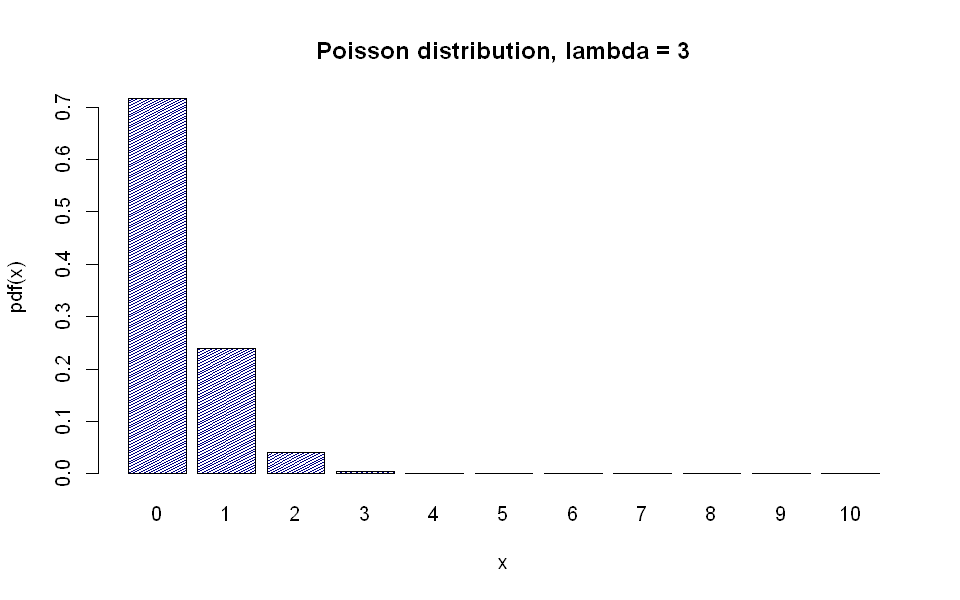

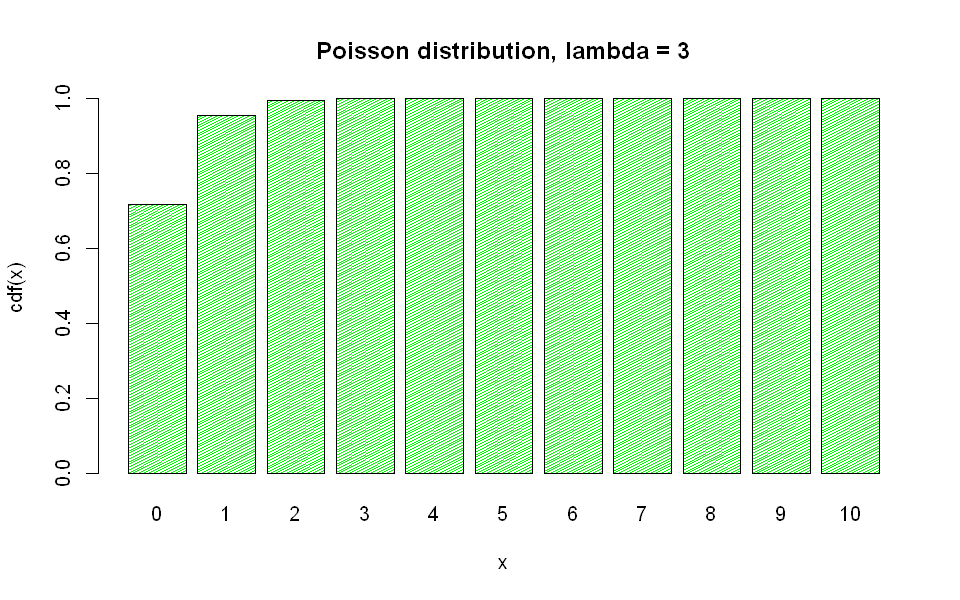

In [9]:
#Plots
x <- 0:10
pdf <- dpois(x, 1/3)
cdf <- ppois(x, 1/3)

barplot(pdf, names=x, col='navy',  xlab='x', ylab='pdf(x)', density=40, main = 'Poisson distribution, lambda = 3')
barplot(cdf, names=x, col='green', xlab='x', ylab='cdf(x)', density=40, main = 'Poisson distribution, lambda = 3')

In [10]:
#Probability of at least one error in a certain page is 1 - PDF(x=0) = 1 - P[X = 0]
(probability_at_least_one_error <- 1 - dpois(0, 1/3))

[1] 0.2834687

# Exercise 4
We randomly draw cards from a deck of $52$ cards, with replacement, until one ace is drawn. Calculate the probability that at least $10$ draws are needed.


**Solution** The number of draws needed to find the first ace follows a geometric distribution. Let $X \geq 1$ be the number of draws needed to get an ace, i.e. any of the $4$ aces is drawn at the $X$-th draw. Then $\mathbb{P}[X=k] = (1-p)^{k-1}p$.

We want to compute $\mathbb{P}[X \geq 10]$, which is:
$$\mathbb{P}[X \geq 10] = 1 - \mathbb{P}[X < 10] = 1 - (p + p(1-p) + p(1-p)^2 + \dots + p(1-p)^8) = 1 - \rm{CDF}(X=8)$$


In [11]:
(1 - pgeom(8, 4/52))

[1] 0.4865652

# Exercise 5
The file available at the URL [https://userswww.pd.infn.it/~agarfa/didattica/
sindaciincarica.csv](https://userswww.pd.infn.it/~agarfa/didattica/
sindaciincarica.csv) contains the list of all mayors currently in charge in the Italian mayors working in local towns in Italy. (Updated to April 6, 2020).

1. Open `R` and import the file in a `tibble` or `data.frame`

In [12]:
library(tidyverse)
url <- "https://userswww.pd.infn.it/~agarfa/didattica/sindaciincarica.csv"
data <- tibble(read_csv2(url, skip=2))

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.0     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.
Parsed with column specification:
cols(
  codice_regione = col_character(),
  codice_provincia = col_character(),
  codice_comune = col_character(),
  denominazione_comune = col_character(),
  sigla_

2. Plot the gender distribution among the mayors (column name `sesso`).

In [13]:
table(data$sesso)


   F    M 
1115 6594 

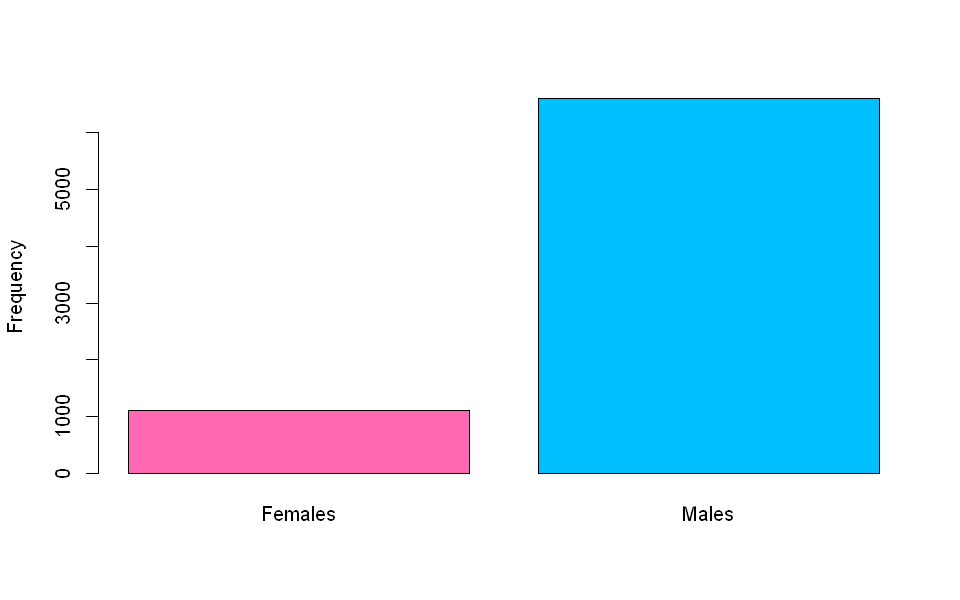

In [14]:
barplot(table(data$sesso), col=c('hotpink','deepskyblue'), ylab='Frequency', names.arg=c('Females', 'Males'))

2. Plot the number of towns grouped per province (`codice_provincia`) and per region (`codice_regione`)

Warning message in brewer.pal(n = length(table(data$codice_regione)), name = "Spectral"):
"n too large, allowed maximum for palette Spectral is 11
Returning the palette you asked for with that many colors
"

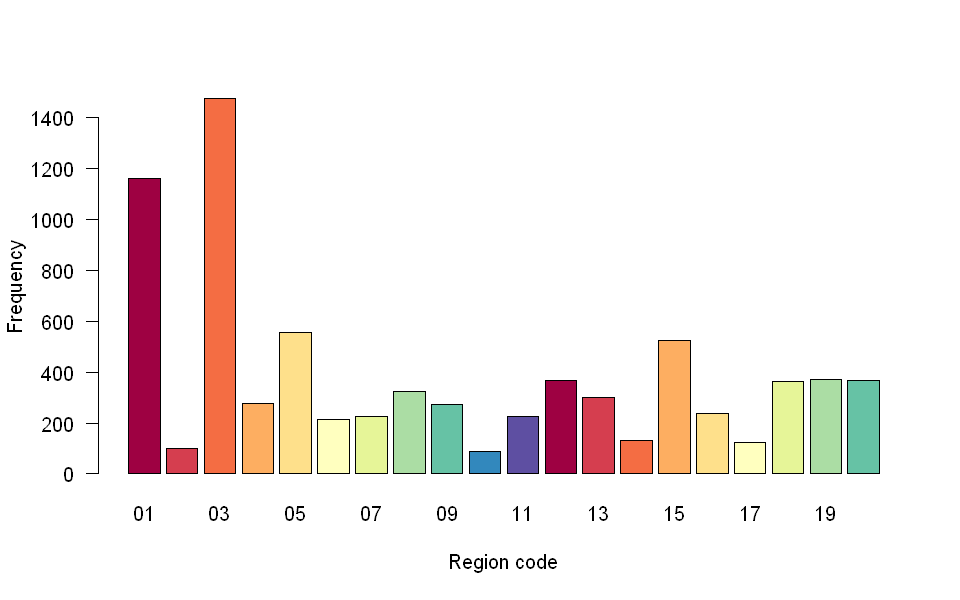

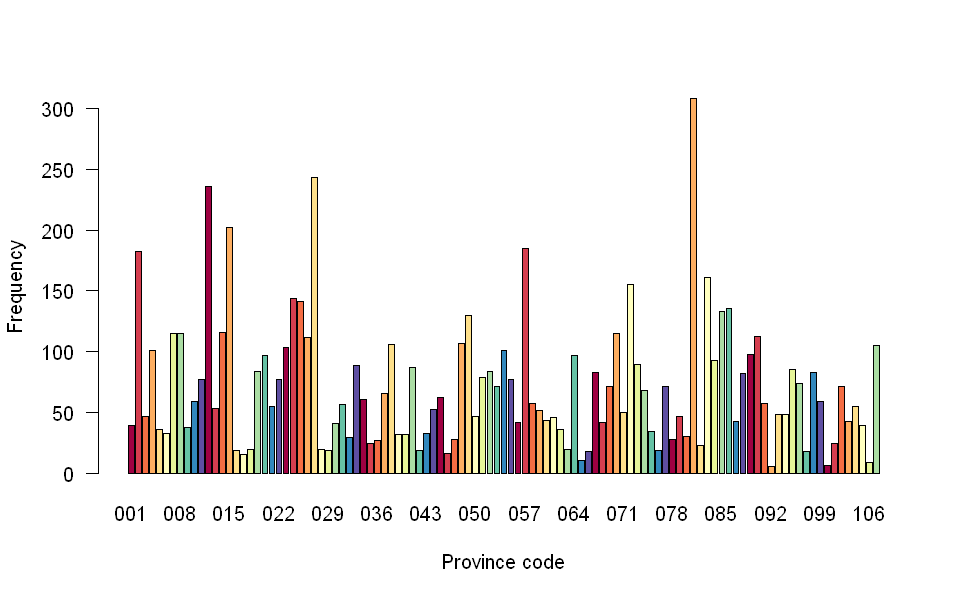

In [15]:
library('RColorBrewer')
colors <- brewer.pal(n = length(table(data$codice_regione)), name = "Spectral")
barplot(table(data$codice_regione), las=1, col=colors, xlab = "Region code", ylab = "Frequency")
barplot(table(data$codice_provincia), las=1, col=colors, xlab = "Province code", ylab = "Frequency")

3. Plot a distribution of the age (years only) of the mayors. In the `data_nascita` column the birthday is available

In [16]:
today = Sys.Date()
ages <- as.integer(difftime(today, as.Date(data$data_nascita, format='%d/%m/%Y'), units='days') / 365)

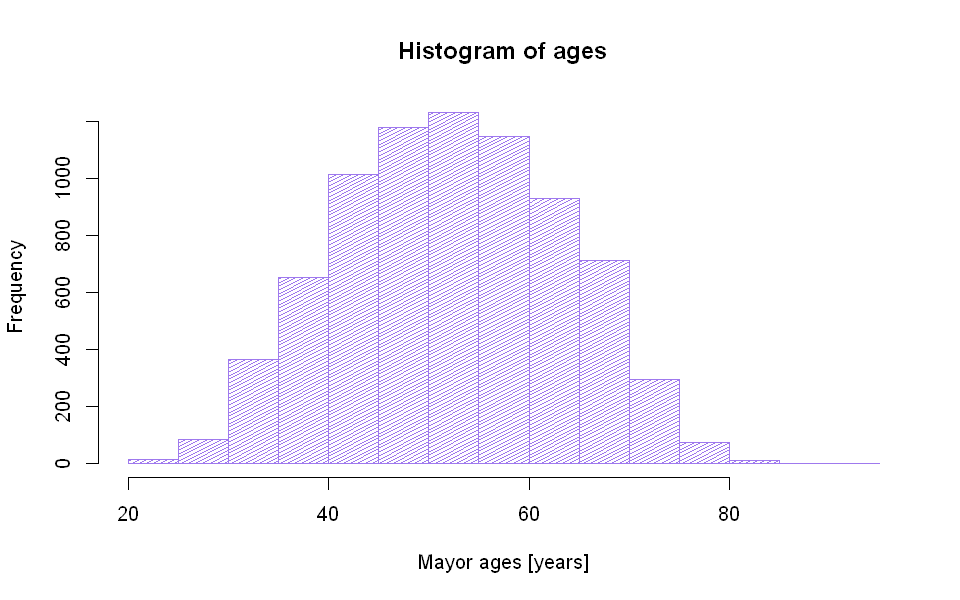

In [17]:
hist(ages, xlab='Mayor ages [years]', ylab='Frequency', col='mediumpurple2', density=30) #colora

4. Plot a distribution of the time the mayor is in charge. The starting date is in column `data_elezione`. Since elections happen every $5$ years, how many of them are going to complete their mandate this year? And how many in $2021$?

**Solution** We start by computing the days elapsed between the start of each major mandate, and the last day of this year. If the number of days is over $5$ years, then the mayor will complete their mandate this year.

For the following year ($2021$), we do the same computation, but subtract the number of mayors with mandates over $6$ years - such that we do not count two times the ones that terminated their service in $2020$.

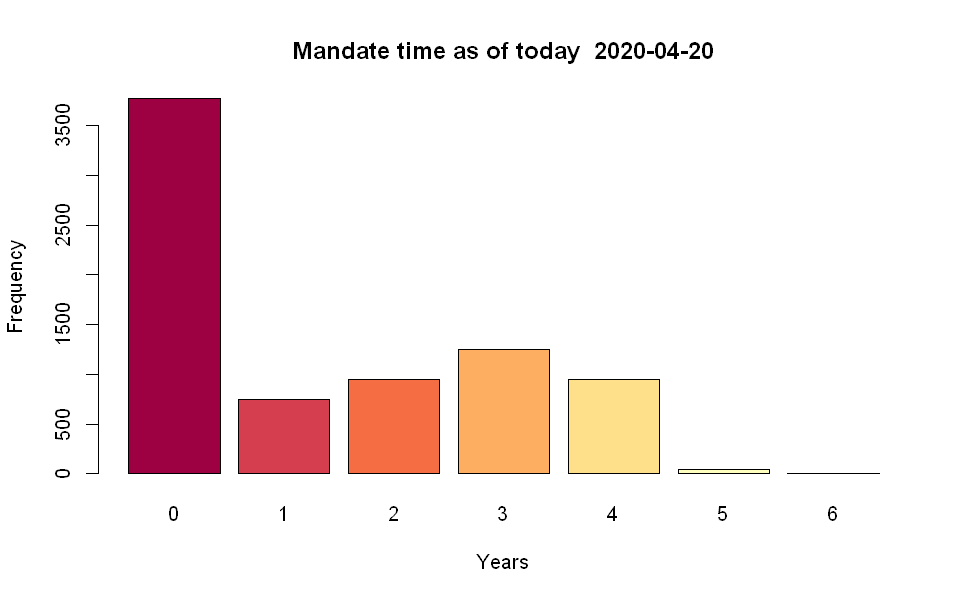

In [18]:
election_dates <- as.Date(data$data_elezione, format='%d/%m/%Y')
charge_times = difftime(today, election_dates, units='days') / 365
barplot(table(as.integer(charge_times)), main=paste('Mandate time as of today ', today), xlab='Years', ylab='Frequency',
        col = colors)

In [19]:
mandate_length_20 <- difftime(as.Date('31/12/2020', format='%d/%m/%Y'), election_dates, units='days') / 365
mandate_length_21 <- difftime(as.Date('31/12/2021', format='%d/%m/%Y'), election_dates, units='days') / 365

In [20]:
sprintf('Number of mandates ending in 2020: %d', sum(mandate_length_20 > 5))

[1] "Number of mandates ending in 2020: 991"

In [21]:
sprintf('Number of mandates ending in 2021: %d', sum(mandate_length_21 > 5) - sum(mandate_length_21 > 6))

[1] "Number of mandates ending in 2021: 1245"